In [19]:
!pip install scikit-learn pandas

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
def main():
  train_data = pd.read_csv("/content/drive/MyDrive/train_data.csv", header=None)
  train_label = pd.read_csv("/content/drive/MyDrive/train_label.csv", header=None).squeeze()
  test_data  = pd.read_csv("/content/drive/MyDrive/test_data.csv", header=None)
  test_label = pd.read_csv("/content/drive/MyDrive/test_label.csv", header=None).squeeze()

  # 處理 NaN -> 用平均值填補
  imputer = SimpleImputer(strategy="mean")

  train_data_imputed = imputer.fit_transform(train_data)
  test_data_imputed  = imputer.transform(test_data)

  rf = RandomForestClassifier(random_state=42, n_jobs=-1)
  rf.fit(train_data_imputed, train_label)

  # 找到機率最高的類別
  y_pred = rf.predict(test_data_imputed)
  y_proba = rf.predict_proba(test_data_imputed)
  confidence_scores = np.max(y_proba, axis=1)
  predicted_classes  = rf.classes_[np.argmax(y_proba, axis=1)]

  # 結果悶ㄦ
  print("Random Forest Classification result")
  print(f"Accuracy:", accuracy_score(test_label, y_pred))
  print("Classification Report:\n", classification_report(test_label, y_pred))
  print("\nConfusion Matrix:")

  # confusion matrix 視覺化
  conf_matrix = confusion_matrix(test_label, y_pred)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion Matrix")
  plt.xlabel("Predicted Value")
  plt.ylabel("Actual Value")
  plt.show()

  threshold = 0.7  # confidence門檻

  results_df = pd.DataFrame(test_data_imputed)
  results_df["true_label"] = test_label.values
  results_df["pred_label"] = y_pred
  results_df["confidence"] = confidence_scores

  known_df   = results_df[results_df["confidence"] >= threshold]
  unknown_df = results_df[results_df["confidence"] < threshold]

  known_df.to_csv("/content/drive/MyDrive/RF_known.csv", index=False)
  unknown_df.to_csv("/content/drive/MyDrive/RF_unknown.csv", index=False)

  """
  觀察結果用ㄉ
  results_df = pd.DataFrame({
      "true_label": test_label.values,
      "pred_label": y_pred,
      "confidence": confidence_scores
  })

  print("\n--- 前 10 sample 的 prediction & confident score---")
  print(results_df.head(10))
  """

Random Forest Classification result
Accuracy: 0.37341772151898733
Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.96      0.54        50
           2       0.23      0.71      0.34         7
           3       0.60      1.00      0.75         3
           4       0.50      1.00      0.67         1
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        22

    accuracy                           0.37       158
   macro avg       0.31      0.36      0.28       158
weighted avg       0.18      0.37      0.22       158


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


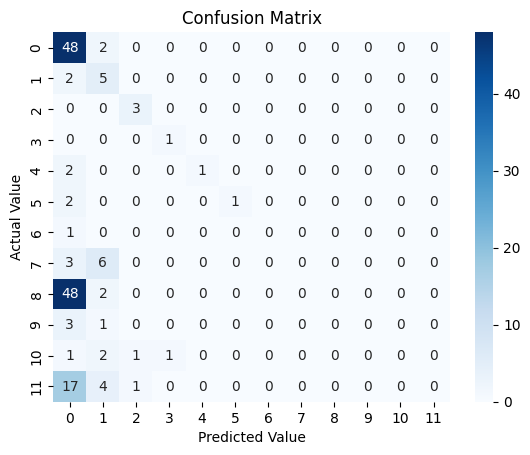

In [24]:
if __name__ == "__main__":
    main()